In [61]:
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# import csv
stock_df = pd.read_csv('stock_complete_info_bigrams.csv', index_col=0)

In [63]:
# create qtr column to get average return for each qtr
stock_df['Qtr'] = [x.split(' ')[1] for x in stock_df.index.values]

In [64]:
# group by qtr
stock_df_qtrs = stock_df.groupby('Qtr')

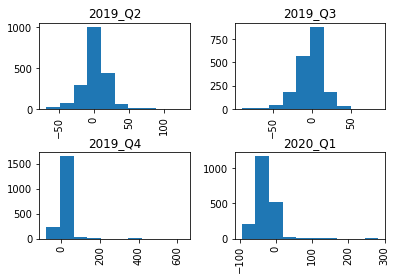

In [65]:
# show distribution of returns by qtr
_ = stock_df['Return'].hist(by=stock_df['Qtr'])

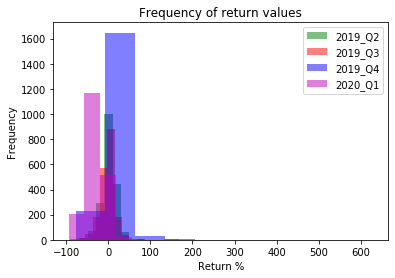

In [66]:
# another method
fix, ax = plt.subplots()
qtrs = list(stock_df_qtrs.groups.keys())
plt.hist(stock_df_qtrs.get_group(qtrs[0])['Return'].values, color='g', label=qtrs[0], alpha=.5)
plt.hist(stock_df_qtrs.get_group(qtrs[1])['Return'].values, color='r', label=qtrs[1], alpha=.5)
plt.hist(stock_df_qtrs.get_group(qtrs[2])['Return'].values, color='b', label=qtrs[2], alpha=.5)
plt.hist(stock_df_qtrs.get_group(qtrs[3])['Return'].values, color='m', label=qtrs[3], alpha=.5)
plt.gca().set(title='Frequency of return values', ylabel='Frequency', xlabel='Return %')
plt.legend()
plt.show()

In [67]:
# drop some outliers and revisualize
stock_df_condensed = stock_df[stock_df['Return'].between(stock_df['Return'].quantile(.01), stock_df['Return'].quantile(.99))]


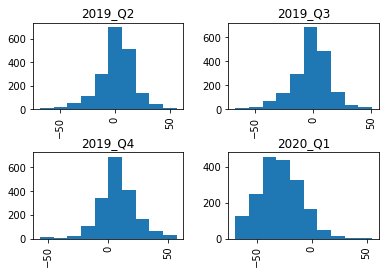

In [68]:
# show distribution of returns by qtr
_ = stock_df_condensed['Return'].hist(by=stock_df['Qtr'])

In [69]:
# group by qtr
stock_df_condensed_qtrs = stock_df_condensed.groupby('Qtr')

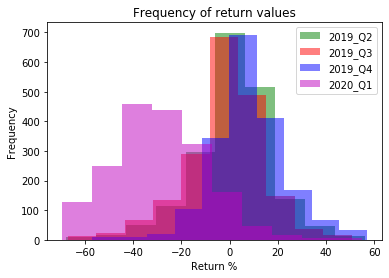

In [70]:
# another method
fix, ax = plt.subplots()
qtrs = list(stock_df_condensed_qtrs.groups.keys())
plt.hist(stock_df_condensed_qtrs.get_group(qtrs[0])['Return'].values, color='g', label=qtrs[0], alpha=.5)
plt.hist(stock_df_condensed_qtrs.get_group(qtrs[1])['Return'].values, color='r', label=qtrs[1], alpha=.5)
plt.hist(stock_df_condensed_qtrs.get_group(qtrs[2])['Return'].values, color='b', label=qtrs[2], alpha=.5)
plt.hist(stock_df_condensed_qtrs.get_group(qtrs[3])['Return'].values, color='m', label=qtrs[3], alpha=.5)
plt.gca().set(title='Frequency of return values', ylabel='Frequency', xlabel='Return %')
plt.legend()
plt.show()

In [71]:
# mean returns with all stocks
qtr_mean_returns = stock_df_qtrs['Return'].mean()
print(qtr_mean_returns)

Qtr
2019_Q2     2.110926
2019_Q3    -2.051225
2019_Q4    10.446679
2020_Q1   -29.987849
Name: Return, dtype: float64


In [72]:
# mean returns with dropped outlier stock
qtr_condensed_mean_returns = stock_df_condensed_qtrs['Return'].mean()
print(qtr_condensed_mean_returns)

Qtr
2019_Q2     1.502301
2019_Q3    -2.049707
2019_Q4     7.968167
2020_Q1   -28.825088
Name: Return, dtype: float64


In [73]:
# insert market mean return into stock_df
stock_df['Entire Market Return'] = stock_df['Qtr'].apply(lambda x: qtr_mean_returns[x])
stock_df['Outlier Removed Market Return'] = stock_df['Qtr'].apply(lambda x: qtr_condensed_mean_returns[x])

In [74]:
# boolean value for if stock quarter performed better or worse than either either merket return
stock_df['Beat Entire Market Return'] = (stock_df['Return'] > stock_df['Entire Market Return']).astype(int)
stock_df['Beat Outlier Removed Market Return'] = (stock_df['Return'] > stock_df['Outlier Removed Market Return']).astype(int)

In [75]:
# convert back to .csv
stock_df.to_csv('stock_complete_info_bigrams.csv')